In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
path = r'C:\Users\Valens\Documents\Python Anaconda\New York City Airbnb Open Data analysis'

In [4]:
df = pd.read_pickle(os.path.join(path, '02 Data','Prepared Data', 'AB_NYC_2019_CLEAN.pkl'))

In [5]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2539,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1,9,2018-10-19 00:00:00.000000000,0.21,6,365
1,2595,Skylit Midtown Castle,2595,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1,45,2019-05-21 00:00:00.000000000,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,3647,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,3,0,2018-10-04 01:47:23.910099456,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,3831,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1,270,2019-07-05 00:00:00.000000000,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,5022,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,10,9,2018-11-19 00:00:00.000000000,0.10,1,0


### Data Cleaning

In [6]:
df.shape

(48895, 16)

### Missing Values

In [7]:
# Check for missing values

df.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

### Duplicates Check

In [8]:
dups = df.duplicated()

In [9]:
df[dups].shape

(0, 16)

### Extreme values check

D:\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

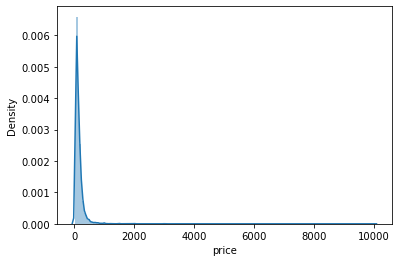

In [10]:
sns.distplot(df['price'], bins=200) # Shows extreme values



In [11]:
df = df[df['price']<1500]
# The main reason to pick this number is because the price of an apartment beyond this number might result an inaccuracy of the analysis. $1500 is a good number because this is the price before the number become outlier.

D:\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

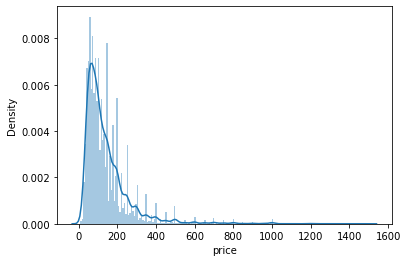

In [12]:
sns.distplot(df['price'], bins=200) # Shows extreme values



In [13]:
df['price'].mean()

142.93874261352352

In [14]:
df['price'].median()

105.0

In [15]:
df['price'].max()

1497.0

In [16]:
df['price'].min()

10.0

<AxesSubplot:xlabel='number_of_reviews', ylabel='Count'>

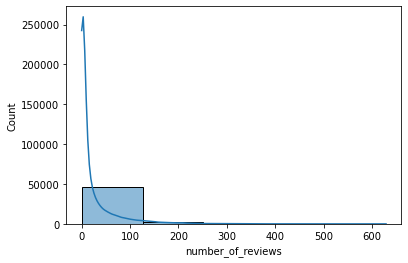

In [17]:
sns.histplot(df['number_of_reviews'], bins=5, kde = True) # shows extreme values for 'number_of_reviews'

In [18]:
df[df['number_of_reviews'] >250]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
3,3831,Cozy Entire Floor of Brownstone,3831,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1,270,2019-07-05,4.64,1,194
7,5178,Large Furnished Room Near B'way,5178,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79.0,2,430,2019-06-24,3.47,1,220
17,7322,Chelsea Perfect,7322,Doti,Manhattan,Chelsea,40.74192,-73.99501,Private room,140.0,1,260,2019-07-01,2.12,1,12
33,9783,back room/bunk beds,9783,Ssameer Or Trip,Manhattan,Harlem,40.82130,-73.95318,Private room,50.0,3,273,2019-07-01,2.37,3,359
53,14314,Greenpoint Place...Has It All!,14314,Jeanne,Brooklyn,Greenpoint,40.73506,-73.95392,Entire home/apt,144.0,2,328,2019-06-29,2.82,1,234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26977,21366188,Studio apartment near JFK airport /Free parking,21366188,Anabell,Queens,Jamaica,40.66875,-73.78506,Entire home/apt,96.0,1,259,2019-07-07,12.99,1,307
27287,21550302,JFK Comfort.5 Mins from JFK Private Bedroom & ...,21550302,Nalicia,Queens,Springfield Gardens,40.66110,-73.76830,Private room,80.0,1,403,2019-07-06,19.75,3,26
27369,21593310,"STEPS TO LGA, near CITIFIELD, JFK MANHATTAN(RM...",21593310,Asad,Queens,East Elmhurst,40.77046,-73.87336,Private room,60.0,1,257,2019-07-06,12.54,6,351
28651,22176831,JFK 2 Comfort 5 Mins from JFK Private Bedroom,22176831,Nalicia,Queens,Springfield Gardens,40.66158,-73.77050,Private room,50.0,1,341,2019-07-08,17.82,3,25


In [19]:
df = df[df['number_of_reviews'] <250]
# removing listing that have more than 250 reviews, since those property are a very rare case and including them might impact analysis.

<AxesSubplot:xlabel='number_of_reviews', ylabel='Count'>

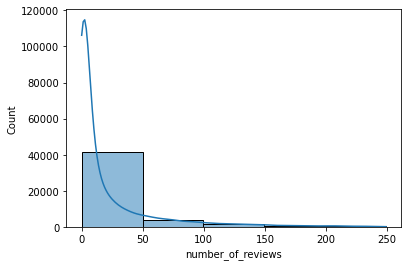

In [20]:
sns.histplot(df['number_of_reviews'], bins=5, kde = True) # shows extreme values for 'number_of_reviews'

In [21]:
df['number_of_reviews'].mean()

21.68375874378392

In [22]:
df['number_of_reviews'].median()

5.0

In [23]:
df['number_of_reviews'].max()

249

### 4. Explore your data visually

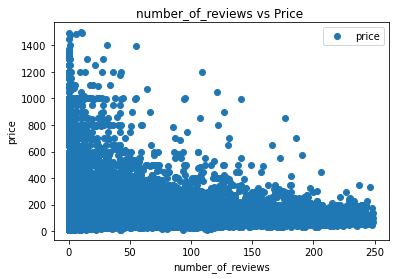

In [24]:
df.plot(x = 'number_of_reviews', y='price',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('number_of_reviews vs Price ')  
plt.xlabel('number_of_reviews')  
plt.ylabel('price')  
plt.show()

### My hypothesis would be the higher the number of reviews the higher the price rent would be

### 6. Reshaping the variable

In [25]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['number_of_reviews'].values.reshape(-1,1)
y = df['price'].values.reshape(-1,1)

In [26]:
X

array([[ 9],
       [45],
       [ 0],
       ...,
       [ 0],
       [ 0],
       [ 0]], dtype=int64)

In [27]:
y

array([[149.],
       [225.],
       [150.],
       ...,
       [115.],
       [ 55.],
       [ 90.]])

### 7. Split the data into two sets: a training set and a test set

In [28]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 8. Run a linear regression on the data and run the training set and create prediction for y on the test set

In [29]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [30]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [31]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

### 9 and 10. Create a plot that shows the regression line on the test set and explanation

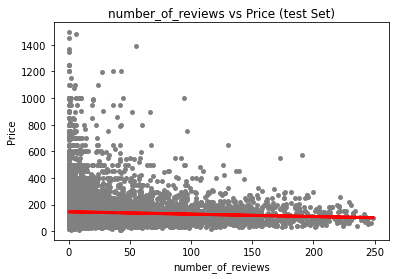

In [32]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('number_of_reviews vs Price (test Set)')
plot_test.xlabel('number_of_reviews')
plot_test.ylabel('Price')
plot_test.show()

### The line doesn't appear to suit this model as you can see from the line above is that the diagram is slightly sloping down. Which mean that the airbnb listing would have a low price when they have more reviews. However, as you also can see from the scatter plot above that this is only partially true. In this graph show even some listing that have low or no review have their price lower than listing that have the highest number of reviews. So I would say that there isn't much correlation.

### 11. Check the model performance statistics—MSE and R2.

In [33]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [34]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.17837526]]
Mean squared error:  15248.31166453184
R2 score:  0.003331259482449278


In [35]:
y_predicted

array([[140.44644497],
       [146.51120378],
       [146.8679543 ],
       ...,
       [143.65719963],
       [109.94427562],
       [139.19781815]])

In [36]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,149.0,140.446445
1,30.0,146.511204
2,160.0,146.867954
3,36.0,146.867954
4,75.0,146.511204
5,120.0,146.867954
6,450.0,141.159946
7,70.0,146.867954
8,65.0,142.586948
9,83.0,146.689579


### 
From the slope we can see that there is a negative relationship between number of reiviews and price. Hence, the downward sloping. Which in this case
the price is lower when the number of reviews increase. However, they don't have strong relationship between this variables. This can also be seen 
on the mean squared error where is quite a large number which also mean that regression may not be the best model to represent this data and can't currately predict the influence of the number of reivews and the listing price. 
R2 Square did also further prove my point where regression method is not fit for purpose. 

One last thing we did is to check the values manually and comparing the actual and predicted values. The result of the actual and predicted is far off. 
Again this further proves that regression line is not a correct method to use in this case. 


A potential bias that I could find the sample bias where the data that was released by Airbnb isn't all the listing that airbnb had on New york listing. Due to this the result could be change. 